### 해시태그 리트윗 네트워크

In [1]:
import jsonlines
import json

In [2]:
def load_jsonl(path):
    data = []
    with open(path, 'r', encoding= 'utf-8') as reader:
        for line in reader:
            data.append(json.loads(line))
    return data

In [3]:
data = load_jsonl('data/repealthe19th.jsonl')
len(data)

23343

In [4]:
retweets = []

for tweet in data :
    if 'retweeted_status' in tweet :
        retweets.append(tweet)
len(retweets)

14858

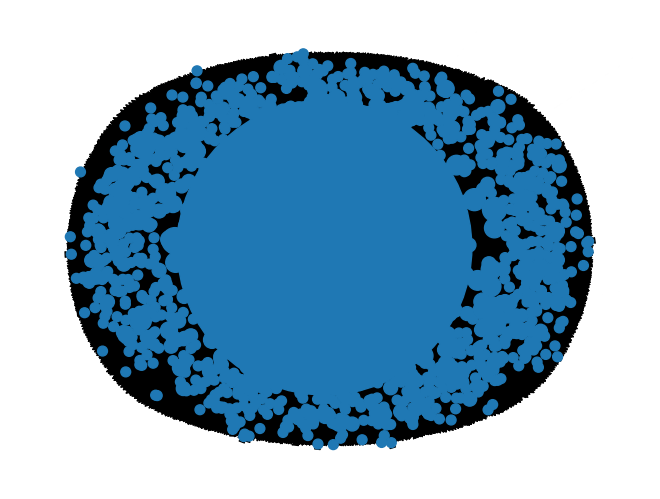

In [63]:
import networkx as nx

h = nx.DiGraph()

for retweet in retweets:
    retweeted_status = retweet['retweeted_status']
    retweeted_sn = retweeted_status['user']['screen_name']
    retweeter_sn = retweet['user']['screen_name']

    if h.has_edge(retweeted_sn, retweeter_sn):
        h.edges[retweeted_sn, retweeter_sn]['weight'] += 1
    else :
        h.add_edge(retweeted_sn, retweeter_sn, weight = 1)

node_sizes = [h.out_degree(n) * 50 for n in h.nodes()]

edges = h.edges()
weights = [h[u][v]['weight'] for u,v in edges]

self = list(nx.selfloop_edges(h))
h.remove_edges_from(self)

nx.draw(h, node_size = node_sizes, width = weights)

In [109]:
import networkx as nx

h = nx.DiGraph()

for retweet in retweets:
    retweeted_status = retweet['retweeted_status']
    retweeted_sn = retweeted_status['user']['screen_name']
    retweeter_sn = retweet['user']['screen_name']

    if h.has_edge(retweeted_sn, retweeter_sn):
        h.edges[retweeted_sn, retweeter_sn]['weight'] += 1
    else :
        h.add_edge(retweeted_sn, retweeter_sn, weight = 1)

node_sizes = [h.out_degree(n) * 50 for n in h.nodes()]

edges = h.edges()
weights = [h[u][v]['weight'] for u,v in edges]

self = list(nx.selfloop_edges(h))
h.remove_edges_from(self)


조밀도

In [111]:
nx.density(h)

6.687882193029756e-05

노드 개수

In [6]:
h.number_of_nodes()

14874

링크 개수

In [19]:
h.number_of_edges()

14795

In [63]:
list(nx.selfloop_edges(h))

[]

나가는 연결강도(가장 많이 리트윗된 사용자)

In [6]:
from operator import itemgetter

sorted(h.out_degree(weight = 'weight'), key= itemgetter(1), reverse= True)[:2]

[('Samandjunk', 901), ('m_kaish_esq', 394)]

들어오는 연결강도(가장 많이 리트윗한 사용자)

In [29]:
sorted(h.in_degree(weight = 'weight'), key = itemgetter(1), reverse=True)[:1]

[('JenTromans', 48)]

가장 많이 리트윗된 트윗의 ID

In [103]:
sorted(h.out_degree(), key = itemgetter(1), reverse= True)[:1]

[('Samandjunk', 900)]

나가는 연결강도가 0인 노드 개수

In [54]:
def zero(x):
    val = list(dict(x).values())
    return val.count(0)

In [55]:
zero(h.out_degree())

12928

연결상태

In [60]:
nx.is_strongly_connected(h)

False

In [62]:
nx.is_weakly_connected(h)

False

약하게 연결된 가장 큰 덩어리

In [65]:
comps = sorted(nx.weakly_connected_components(h), key = len, reverse= True)
big_comp = comps[0]
hwc = nx.subgraph(h, big_comp)
hwc.number_of_nodes()

11909

In [66]:
nx.average_clustering(h)

0.00030038895981708205

### 문제 4.12 - 방향성 네트워크에서 연결선 수와 연결강도 사이의 관계

In [16]:
def val(x):
    val = list(dict(x).values())
    return val

In [68]:
import scipy.stats as stats

stats.pearsonr(val(h.in_degree()), val(h.in_degree(weight = 'weight')))

(0.9968333833023361, 0.0)

In [69]:
stats.pearsonr(val(h.out_degree()), val(h.out_degree(weight = 'weight')))

(0.9999672527231495, 0.0)

In [77]:
sorted(h.in_degree(), key = itemgetter(1), reverse=True)[:5]

[('JenTromans', 48),
 ('ketagoesglobal', 12),
 ('tmmckinney777', 11),
 ('JENw1n525', 11),
 ('HerMillennials', 10)]

In [76]:
sorted(h.in_degree(weight= 'weight'), key = itemgetter(1), reverse=True)[:5]

[('JenTromans', 48),
 ('ketagoesglobal', 12),
 ('tmmckinney777', 11),
 ('JENw1n525', 11),
 ('HerMillennials', 10)]

In [78]:
sorted(h.out_degree(), key = itemgetter(1), reverse=True)[:5]

[('Samandjunk', 900),
 ('m_kaish_esq', 394),
 ('JoyAnnReid', 365),
 ('GeorgeTakei', 360),
 ('charley_ck14', 299)]

In [79]:
sorted(h.out_degree(weight='weight'), key = itemgetter(1), reverse=True)[:5]

[('Samandjunk', 901),
 ('m_kaish_esq', 394),
 ('JoyAnnReid', 366),
 ('GeorgeTakei', 360),
 ('charley_ck14', 299)]

가중치와 조밀도

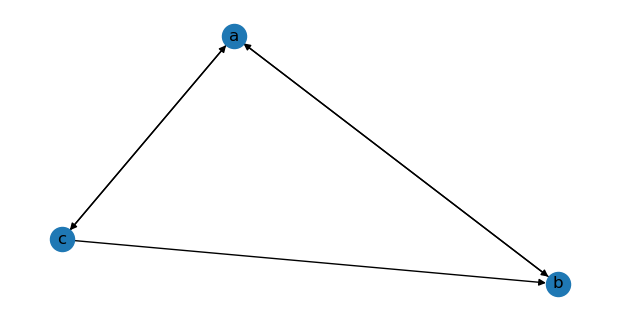

In [91]:
import matplotlib.pyplot as plt
import networkx as nx

s = nx.DiGraph()

s.add_weighted_edges_from([
    ('a','b',2),('a','c',3),
    ('b','a',4),
    ('c','a',5),('c','b',7)
])

plt.rcParams["figure.figsize"] = [6,3]
nx.draw(s, with_labels = True)

In [95]:
ans = []
a = 0

for a in range(len(list(e for e in s.edges.data('weight')))):
    filter_edges = list(filter(lambda e:e[2] < a, (e for e in s.edges.data('weight'))))
    remove_edges = list(e[:2] for e in filter_edges)
    s.remove_edges_from(remove_edges)
    ans.append(nx.density(s))
print(ans)

[0.8333333333333334, 0.8333333333333334, 0.8333333333333334, 0.6666666666666666, 0.5]


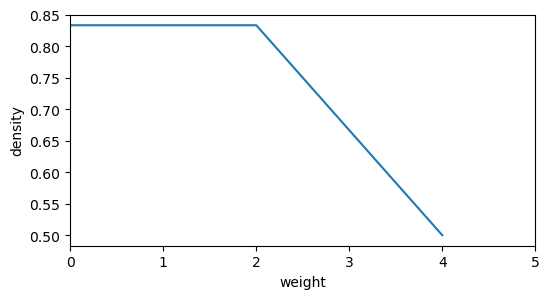

In [102]:
plt.plot(ans)
plt.xlim([0, 5])
plt.xlabel('weight')
plt.ylabel('density')
plt.show()

### 문제 4.13

1번

In [104]:
ans = []
a = 0

for a in range(len(list(e for e in h.edges.data('weight')))):
    filter_edges = list(filter(lambda e:e[2] < a, (e for e in h.edges.data('weight'))))
    remove_edges = list(e[:2] for e in filter_edges)
    h.remove_edges_from(remove_edges)
    ans.append(nx.density(h))

In [136]:
ans[:5]

[6.687882193029756e-05,
 6.687882193029756e-05,
 1.672535594066245e-07,
 9.040732940898622e-09,
 0]

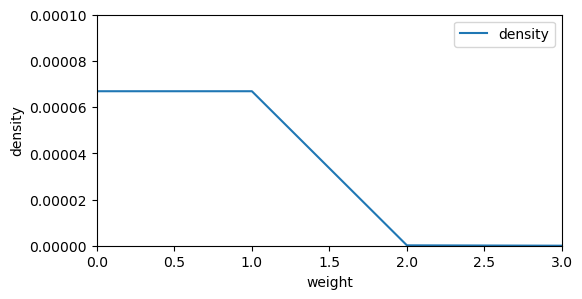

In [161]:
plt.plot(ans)
plt.xlim([0,3])
plt.ylim([0,10**-4])
plt.xlabel('weight')
plt.ylabel('density')
plt.legend(['density'])
plt.show()